In [171]:
import numpy as np
from astropy.coordinates import EarthLocation
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import AltAz

ra_input = float(input("Dec"))
dec_input = float(input("Ra",))
afov = float(input("Apparent FOV in degrees"))*0.017453304004166
f_objective = float(input("Magnification of Objective",))
f_eyepiece = float(input("Magnification of Eyepiece",))
d_telescope = float(input("Diameter in mm",))

fov = afov/(f_objective/f_eyepiece)
data = np.loadtxt("hygdata_v3.csv",delimiter=",",usecols = (23,24,16,33,9,13),dtype=np.str)
ra = data[:,0]
dec = data[:,1]
color = data[:,2]
lum = data[:,3]
dist = data[:,4]
mag = data[:,5]

m_limiting = float(4-2+2.5*np.log10(d_telescope*(f_objective/f_eyepiece)*0.9))
print(m_limiting)

ra = np.array([float(x) for x in ra])
dec = np.array([float(x) for x in dec])
color = np.array([float(x) if x!="" else 0 for x in color])
lum = np.array([float(x) for x in lum])
dist = np.array([float(x) for x in dist])
mag = np.array([float(x) for x in mag])

indices = np.where(mag<=m_limiting)

ra = np.array([-(2*np.pi-x) if x>np.pi else x for x in ra])

ra_visible = ra[indices]
dec_visible = dec[indices]
color = color[indices]


intensity = lum/(dist**2)
norm_int = intensity/np.amax(intensity)

color = np.array([x if x<2 else 2 for x in color])
color = (color - np.amin(color))/(np.amax(color)-np.amin(color))

#filter only ra and dec values within fov

#print (norm_int)

Dec 0.01
Ra 0.1
Apparent FOV in degrees 50
Magnification of Objective 45
Magnification of Eyepiece 1
Diameter in mm 102


11.040137987441465


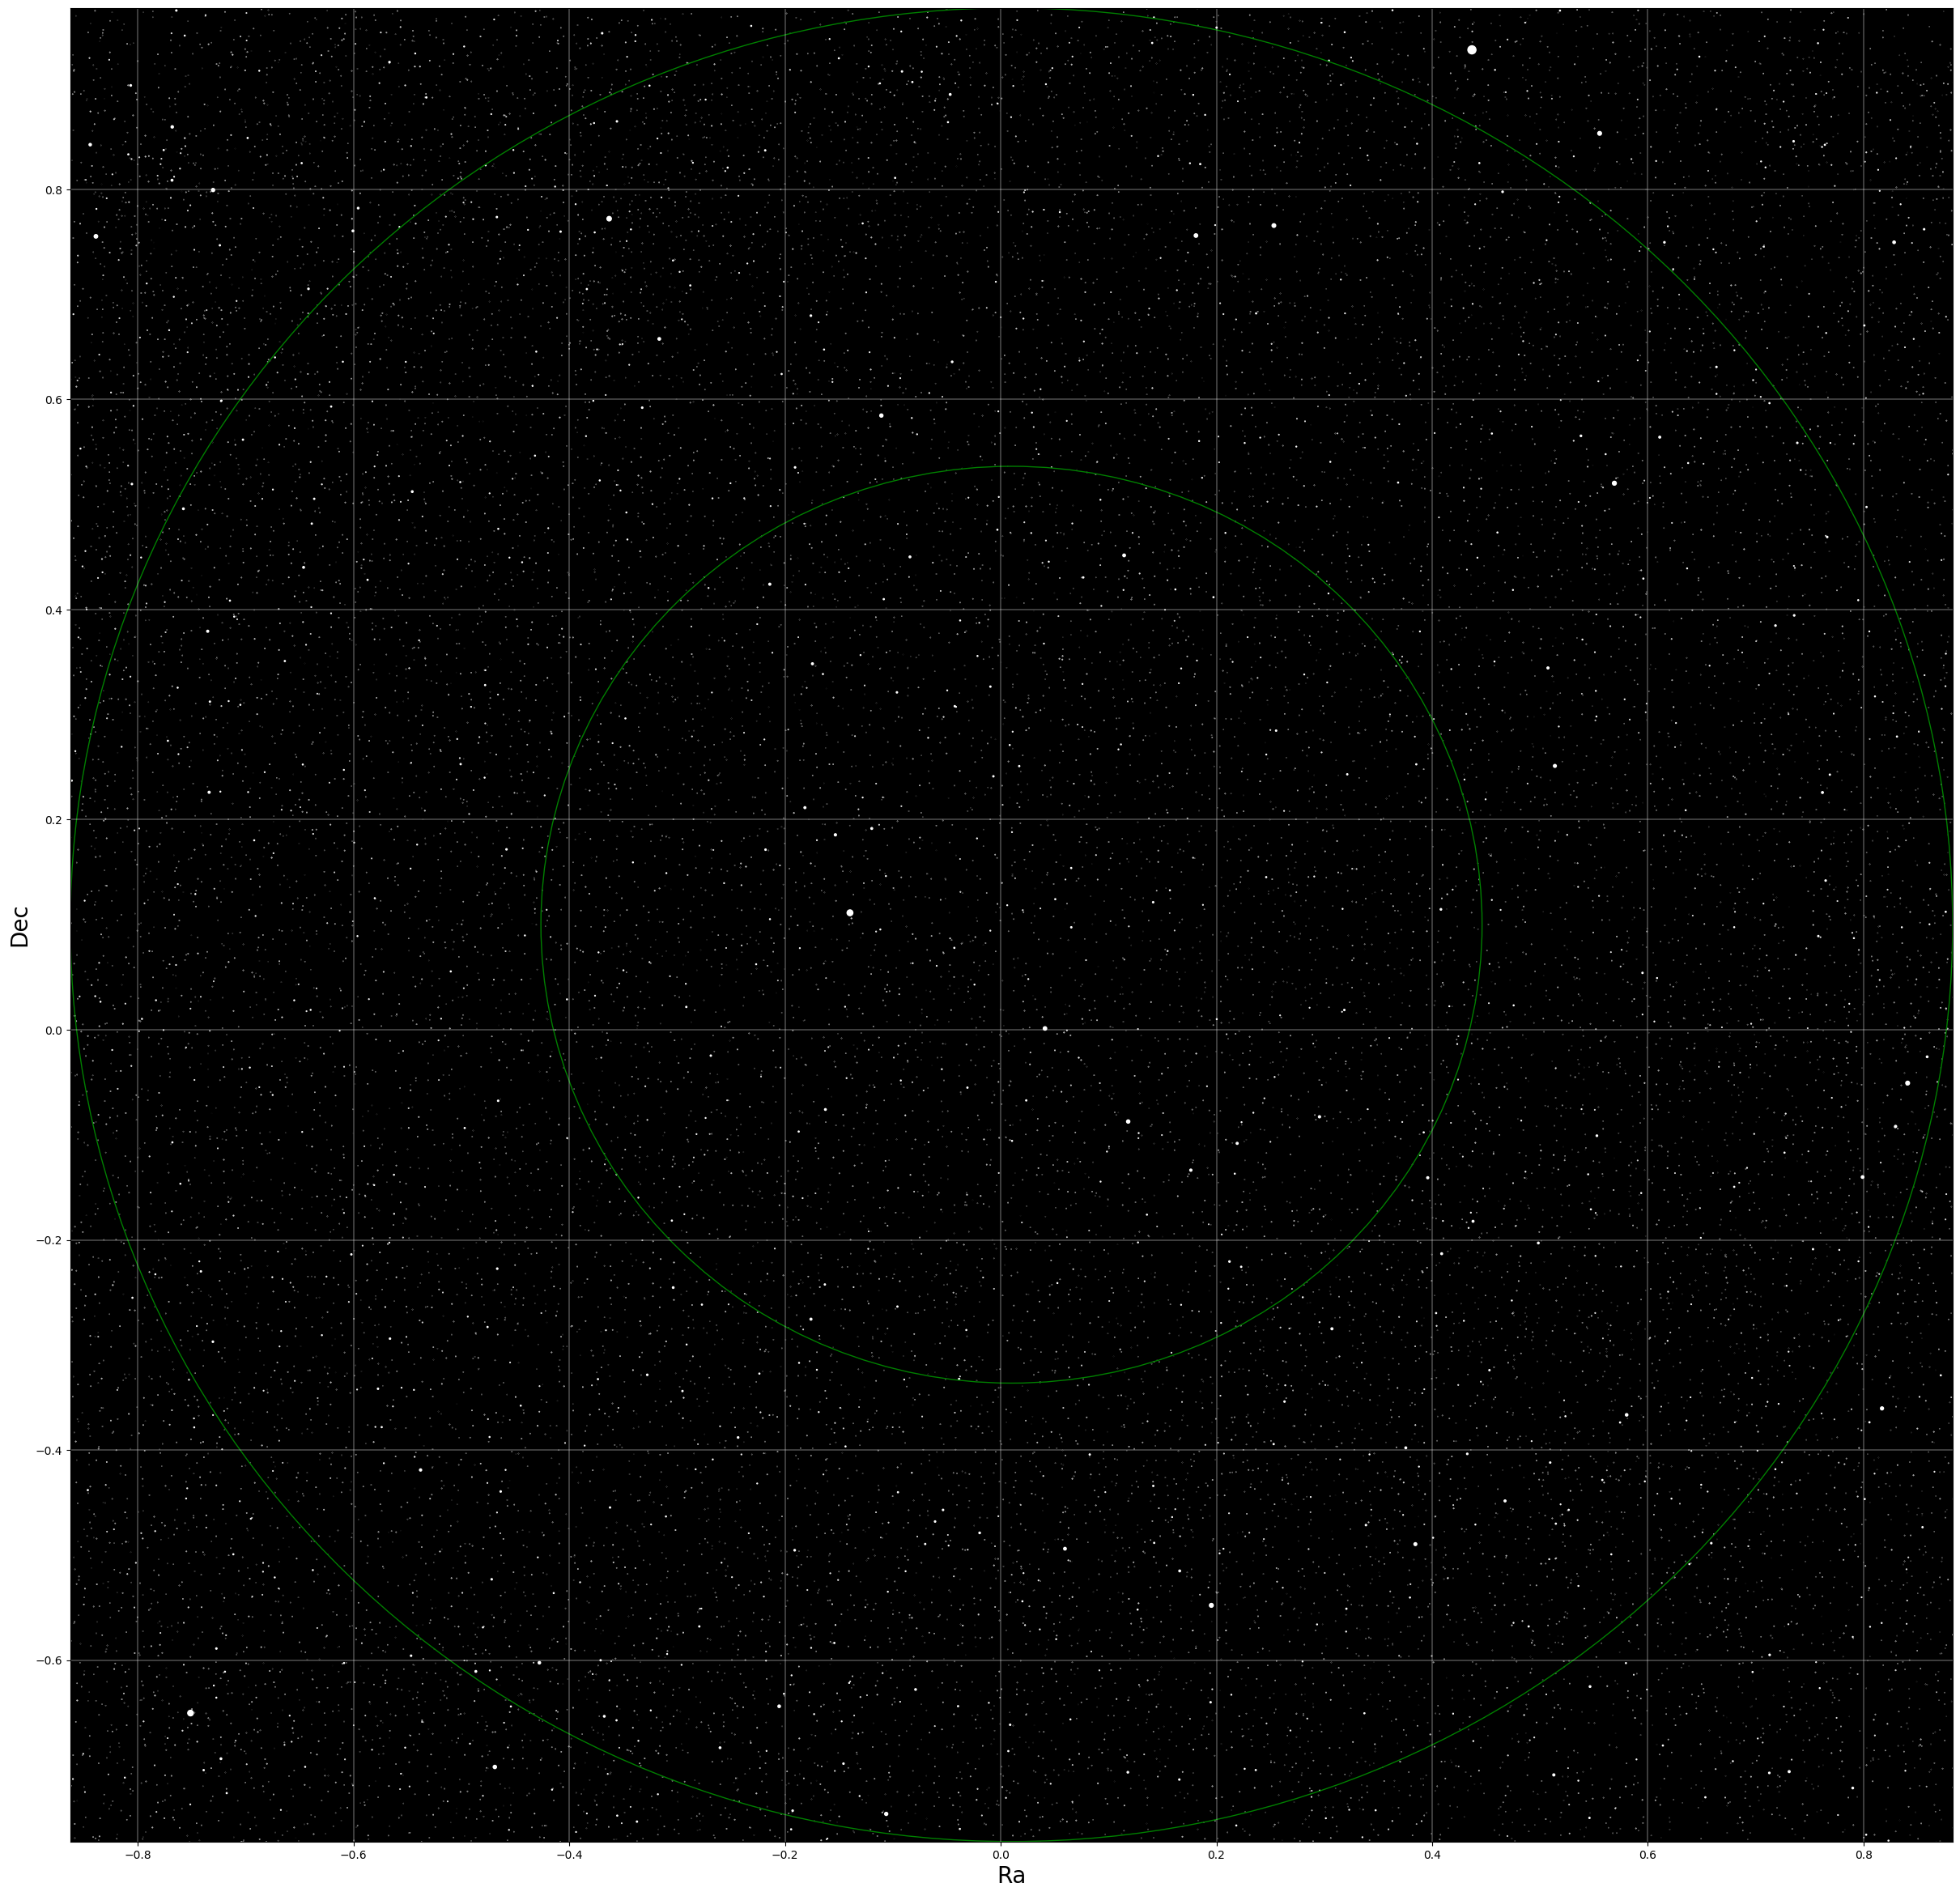

In [177]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30,30),dpi=100,facecolor='white',constrained_layout=False)
ax = fig.add_subplot(111,facecolor = "k")
ax.scatter(ra_visible,dec_visible,s=norm_int*300,color = "white")#c=color,cmap="Spectral")
circle_in = plt.Circle((ra_input,dec_input),fov/2,color="green",fill=False)
circle_out = plt.Circle((ra_input,dec_input),fov,color="green",fill=False)
ax.add_artist(circle_in)
ax.add_artist(circle_out)
ax.grid(True,linewidth=0.35,color='w')
ax.set_xlim([ra_input-fov,ra_input+fov])
ax.set_ylim([dec_input-fov,dec_input+fov])
ax.set_ylabel("Dec",size=20)
ax.set_xlabel("Ra",size=20)
plt.savefig("ex",bbox_inches="tight",facecolor="gray")